## Run bayesian inference

the notebook start by first loading the model config and checking the data for the EL and PL simulatnious fits, 

then you can run the sampling either in the HPC or in the notebook

In [1]:
# load the relevant modules for the analysis

from pl_temp_fit import Exp_data_utils, fit_el_utils
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import os
import json
import uuid
import numpy as np
from pl_temp_fit import config_utils
from pl_temp_fit import covariance_utils, generate_data_utils
import pandas as pd
import glob
from scipy import interpolate
#os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')
os.chdir("/media/mohammed/Work/Work/pl_temp_fit/")#os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

In [2]:
# get test_ids in the database
path_database = Path('fit_experimental_emcee_el/fit_data_base/')
model_config_files = list(path_database.glob('*.json'))
test_id_list = []
for id,model_config_file in enumerate(model_config_files):
    print(id,model_config_file)
    test_id = model_config_file.name.replace('.json','')
    test_id_list.append(test_id)
    model_config,model_config_save = config_utils.load_model_config(test_id, database_folder = path_database)
    print(model_config_save['csv_name_pl'])
    print(model_config_save['csv_name_el'])


0 fit_experimental_emcee_el/fit_data_base/48f8de8c-360d-4a1a-b74c-a3b9d67705bc.json
/media/mohammed/Work/Work/pl_temp_fit/experiemental_data/blends/PM6Y61_1_test_PL.csv
/media/mohammed/Work/Work/pl_temp_fit/experiemental_data/blends/PM6Y61_1_test_EL.csv
1 fit_experimental_emcee_el/fit_data_base/bc820ca7-a9cd-4d11-b8b2-5cbf268c6a2a.json
/media/mohammed/Work/Work/pl_temp_fit/experiemental_data/blends/PM6Y61_1_test_PL.csv
/media/mohammed/Work/Work/pl_temp_fit/experiemental_data/blends/PM6Y61_1_test_EL.csv
2 fit_experimental_emcee_el/fit_data_base/21a2108e-0d2f-40da-b9bf-18aeaf8a9f70.json
/media/mohammed/Work/Work/pl_temp_fit/experiemental_data/blends/PM6Y61_1_test_PL.csv
/media/mohammed/Work/Work/pl_temp_fit/experiemental_data/blends/PM6Y61_1_test_EL.csv
3 fit_experimental_emcee_el/fit_data_base/547fe652-d2e5-4f84-befa-ff5901c83d14.json
/media/mohammed/Work/Work/pl_temp_fit/experiemental_data/blends/PM6Y61_1_test_PL.csv
/media/mohammed/Work/Work/pl_temp_fit/experiemental_data/blends/PM6Y6

In [3]:
import importlib

importlib.reload(config_utils)
test_id = test_id_list[2]
model_config,model_config_save = config_utils.load_model_config(test_id, database_folder = path_database)
csv_name = model_config_save["csv_name_pl"]
print(model_config_save["csv_name_pl"].split("/")[-1])

PM6Y61_1_test_PL.csv


shape of mean value plot is (81, 5)
shape of mean value plot is (81, 5)


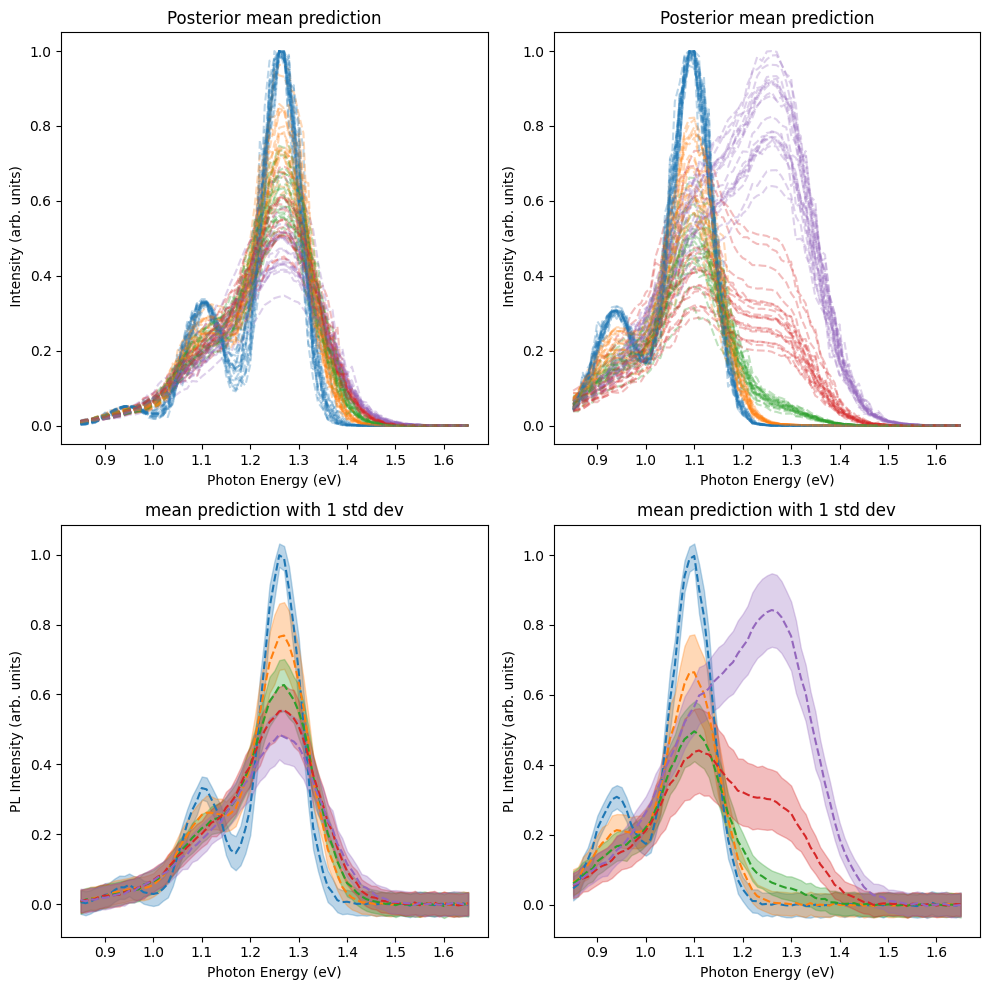

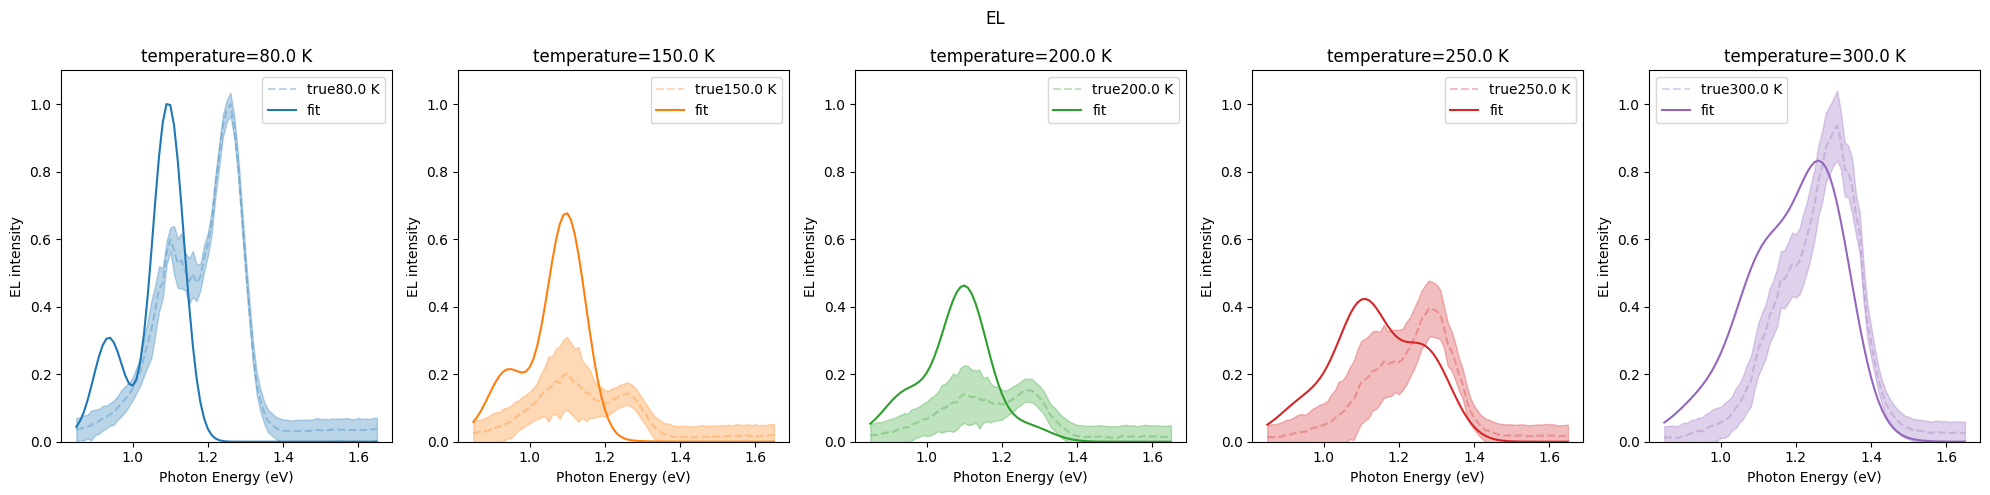

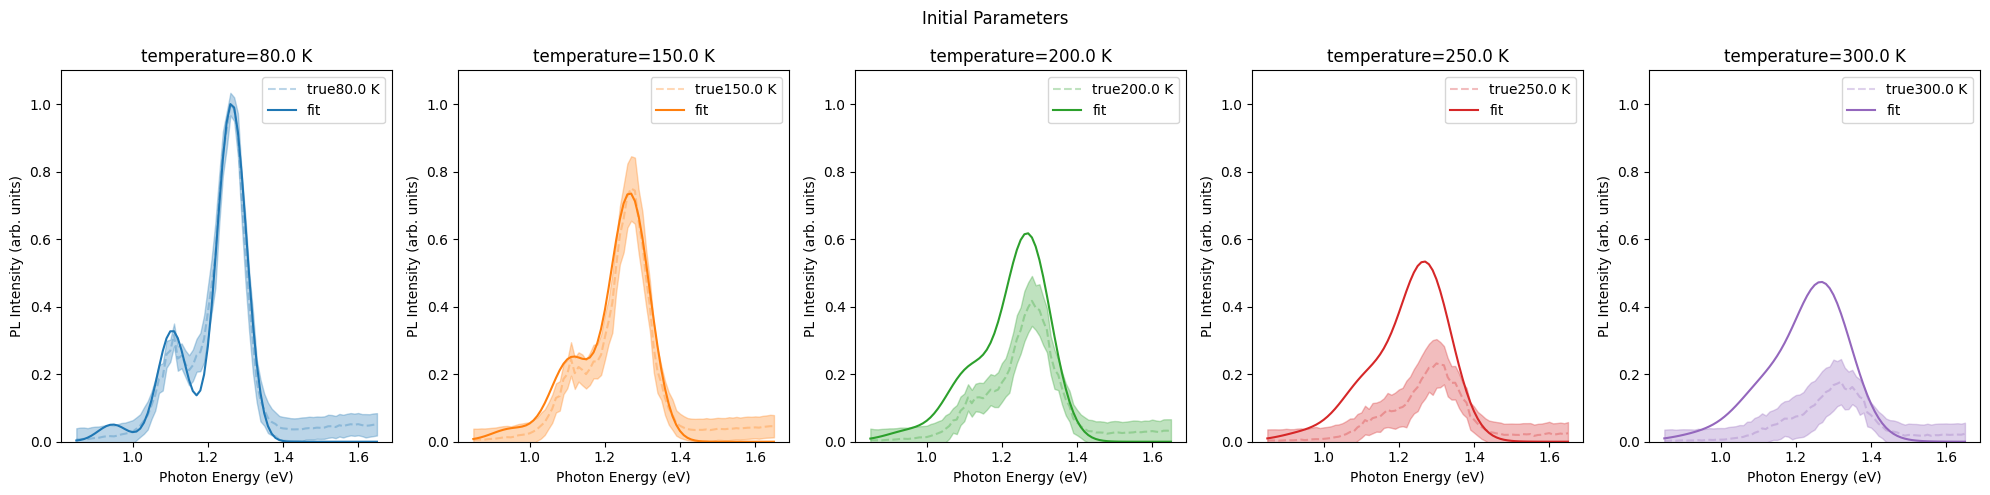

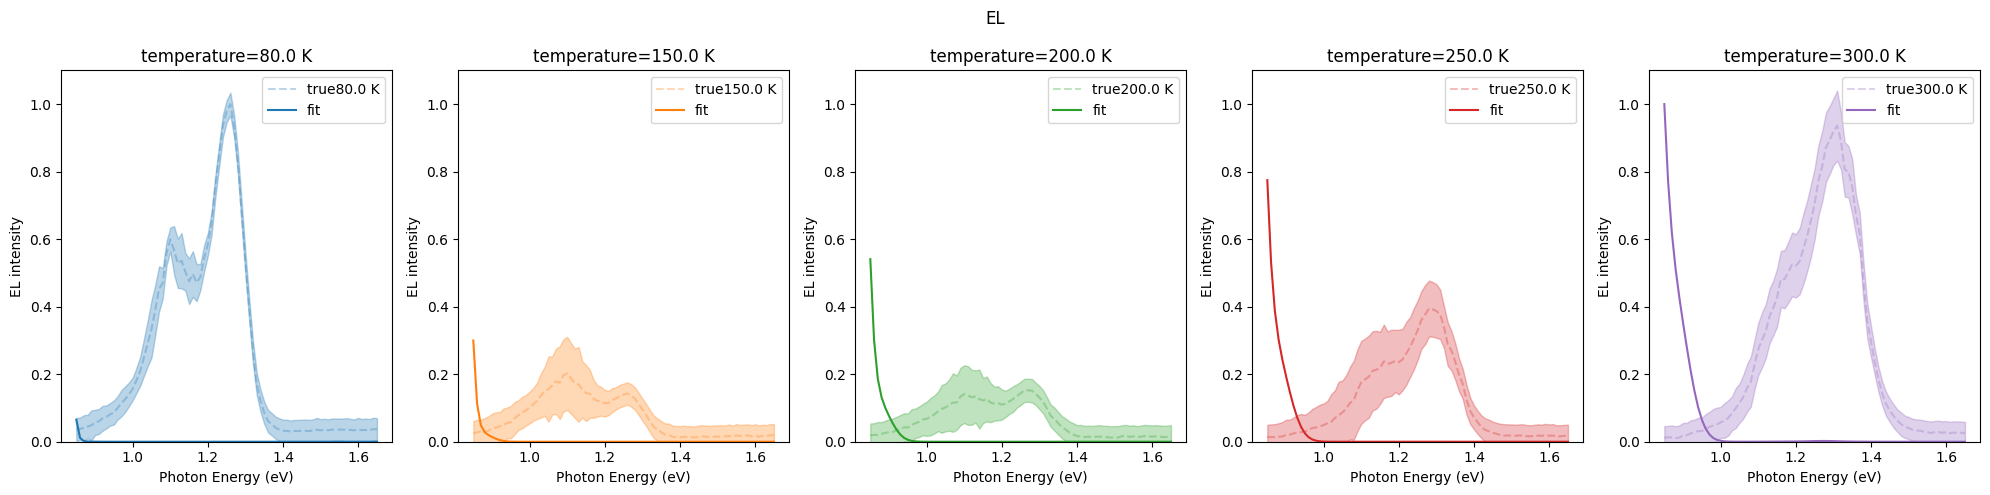

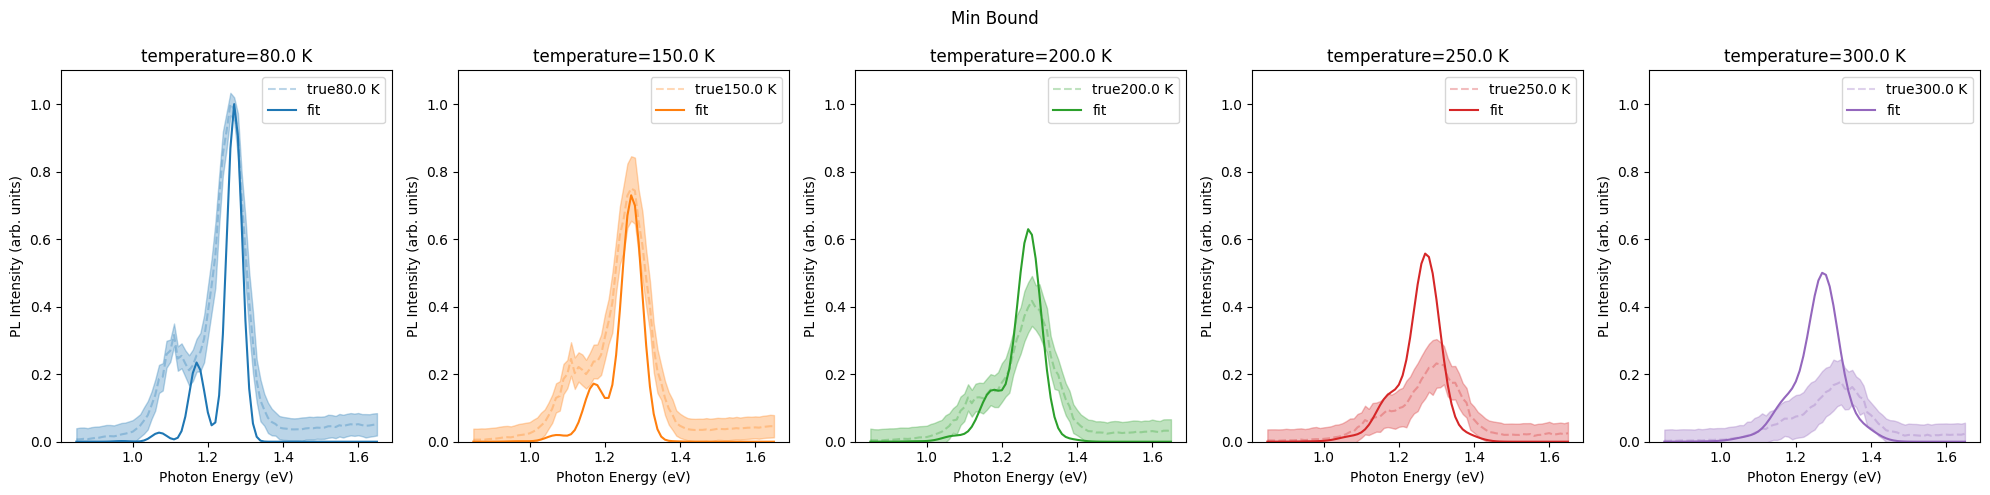

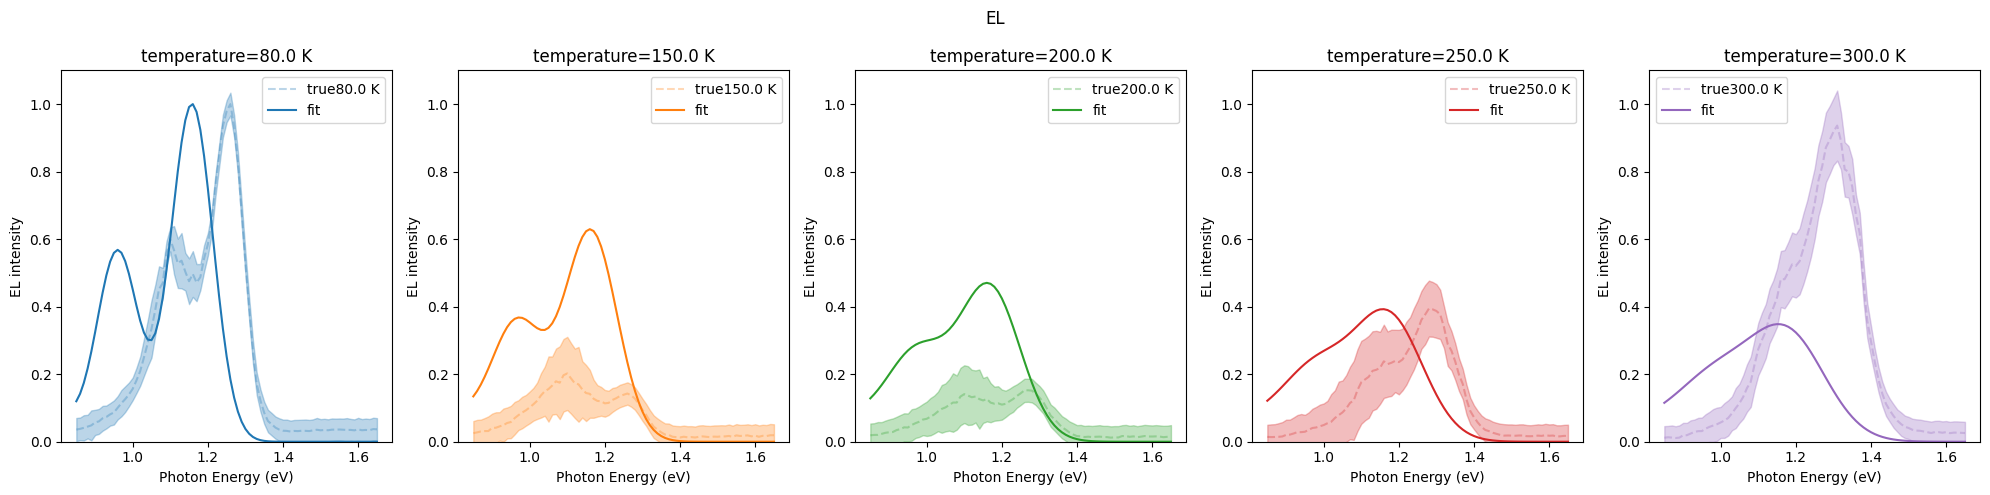

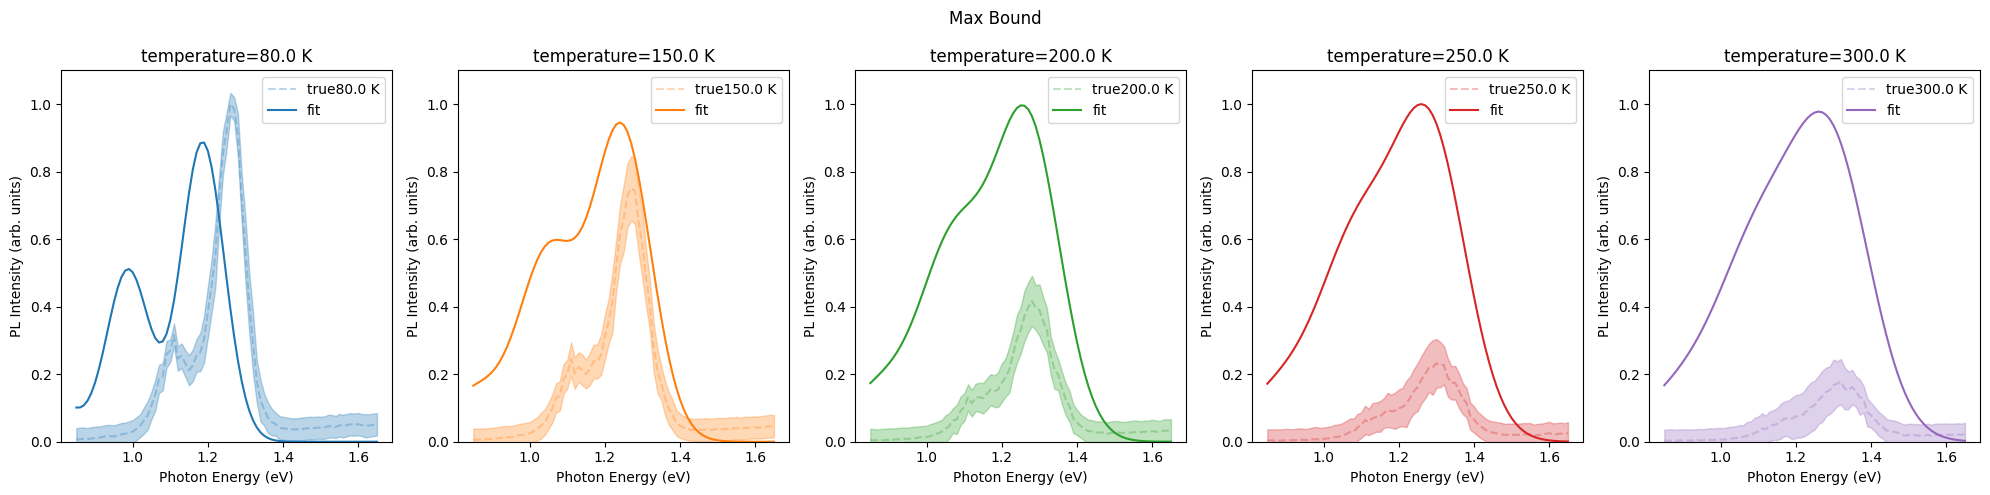

In [4]:
# plot the results with initial parameters
# and the maximum and minumum bounds

from pl_temp_fit import fit_el_utils

import importlib
importlib.reload(fit_el_utils)
fit_el_utils.plot_fit_limits(model_config, model_config_save)

### run sampler in the notebook

In [5]:
import emcee

filename = model_config_save["save_folder"] + "/sampler.h5"
if os.path.exists(filename):
    try:
        reader = emcee.backends.HDFBackend(filename, name="multi_core")
        distribution = reader.get_chain(discard=0, flat=True)  
        true_parameters = fit_el_utils.get_param_dict(model_config_save["params_to_fit_init"],distribution[-1])
    except AttributeError:
        print("no sampler found")
        true_parameters = model_config_save["params_to_fit_init"]
else:
    true_parameters = model_config_save["params_to_fit_init"]
    print("no sampler found")

shape of mean value plot is (81, 5)
shape of mean value plot is (81, 5)


  0%|          | 0/500 [00:00<?, ?it/s]/media/mohammed/Work/anaconda3/envs/pl_temp_fit/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 1/500 [00:05<46:29,  5.59s/it]/media/mohammed/Work/anaconda3/envs/pl_temp_fit/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 2/500 [00:10<44:13,  5.33s/it]/media/mohammed/Work/anaconda3/envs/pl_temp_fit/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
  1%|          | 3/500 [00:16<45:44,  5.52s/it]/media/mohammed/Work/anaconda3/envs/pl_temp_fit/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob

KeyboardInterrupt: 

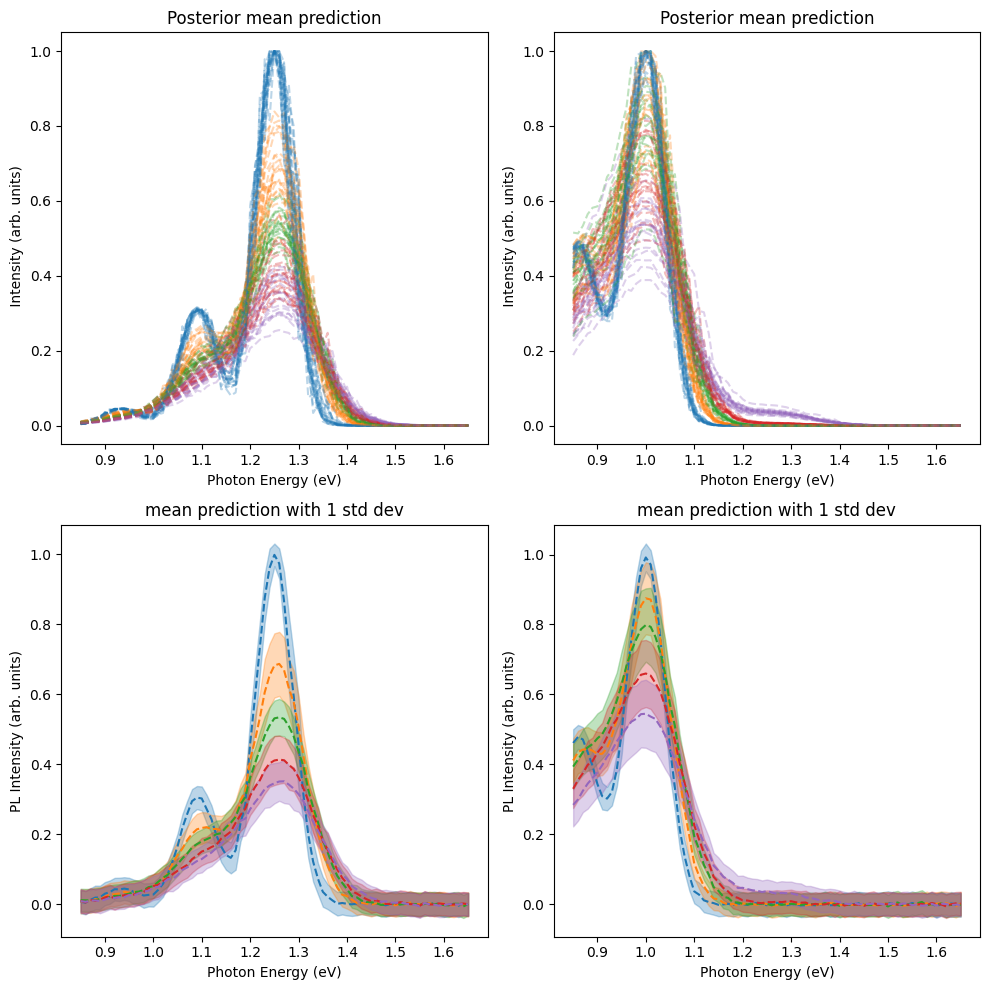

In [8]:
from pl_temp_fit import Emcee_utils, fit_el_utils

importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
importlib.reload(fit_el_utils)
importlib.reload(Emcee_utils)

Temp_std_err = model_config_save["Temp_std_err"]
hws_std_err = model_config_save["hws_std_err"]
relative_intensity_std_error_pl = model_config_save["relative_intensity_std_error_pl"]
sigma = model_config_save["sigma"]
save_folder = model_config_save["save_folder"]
fixed_parameters_dict = model_config_save["fixed_parameters_dict"]
params_to_fit_init = model_config_save["params_to_fit_init"]
min_bounds = model_config_save["min_bounds"]
max_bounds = model_config_save["max_bounds"]
csv_name = model_config_save["csv_name_pl"]
exp_data_pl, temperature_list, hws = Exp_data_utils.read_data(model_config_save["csv_name_pl"])
exp_data_el, temperature_list, hws = Exp_data_utils.read_data(model_config_save["csv_name_pl"])

co_var_mat_pl, co_var_mat_el, variance_el, variance_pl = (
    covariance_utils.plot_generated_data(
        save_folder,
        model_config,
        savefig=True,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit=true_parameters,
    )
)

fit_el_utils.run_sampler_parallel(
    save_folder,
    exp_data_el,
    exp_data_pl,
    co_var_mat_el,
    co_var_mat_pl,
    params_to_fit_init,
    fixed_parameters_dict,
    min_bounds,
    max_bounds,
    model_config,
    nsteps=500,
    coeff_spread=1,
    num_coords=32,
    num_processes=32,
    restart_sampling = True,
)
